In [1]:
from smt.utils.sm_test_case import SMTestCase
from smt.problems import WingWeight
from smt.sampling_methods import LHS
from smt.surrogate_models import KRG
from smt.applications.explainability_tools import PartialDependenceDisplay

In [2]:
ndoe = 300
fun = WingWeight()
sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
x = sampling(ndoe)
y = fun(x)

feature_names = [
    r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$',
    r'$q$', r'$\lambda$', r'$t_{c}$', r'$N_{z}$',
    r'$W_{dg}$', r'$W_{p}$',
]

sm = KRG(
    theta0=[1e-2] * x.shape[1],
    print_prediction=False
)
sm.set_training_values(x, y)
sm.train()

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 300
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  5.3373952


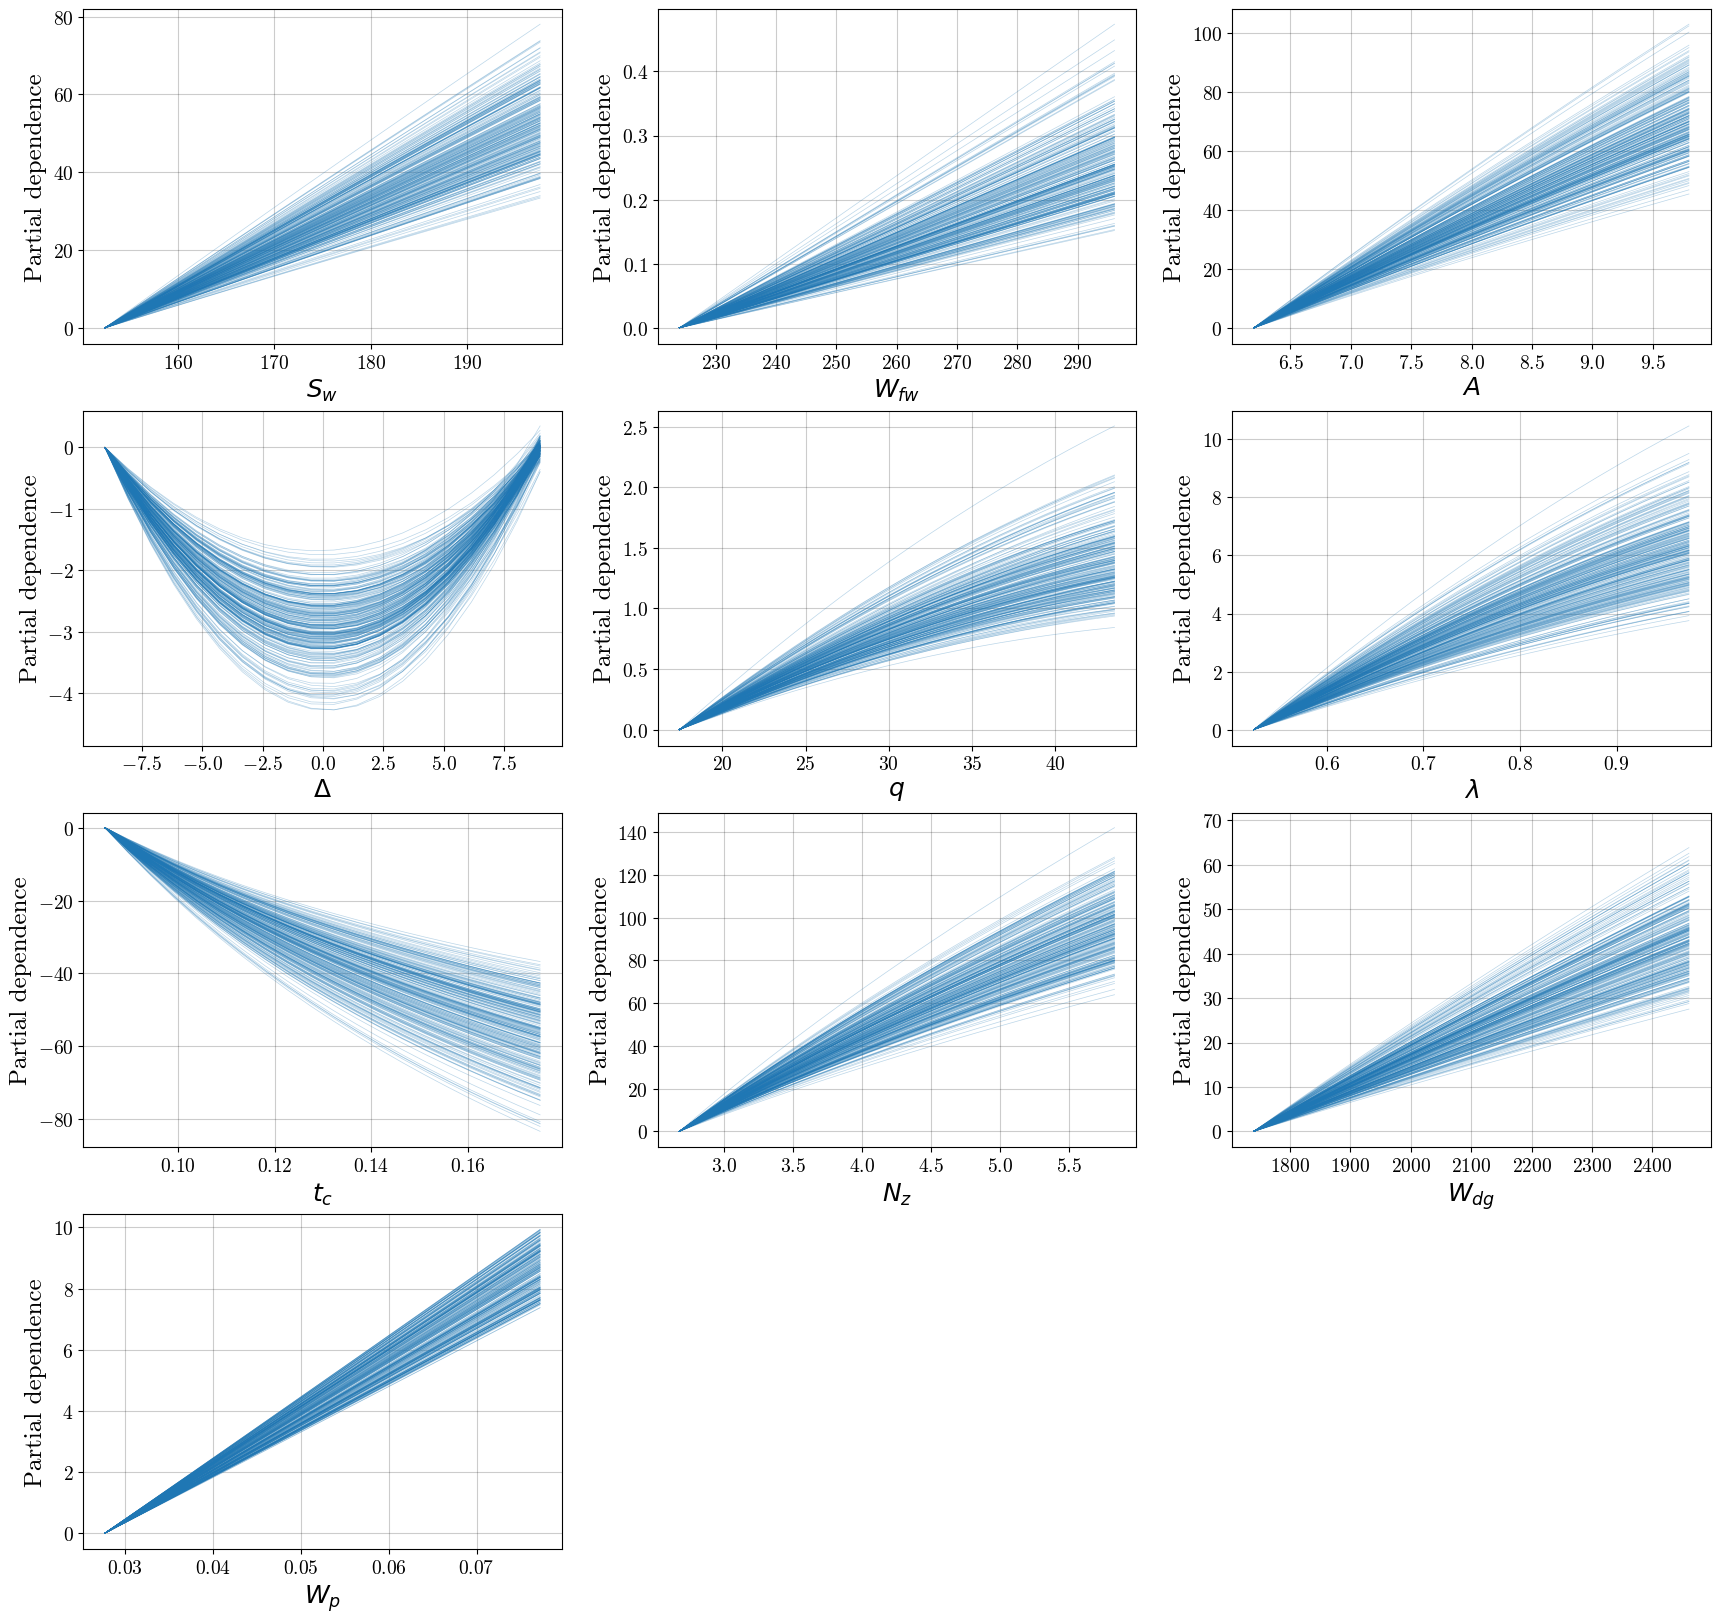

In [61]:
features = [i for i in range(x.shape[1])]
grid_resolution = 20

pdd = PartialDependenceDisplay.from_surrogate_model(
    sm,
    x,
    features,
    feature_names=feature_names,
    kind='individual',
    grid_resolution=grid_resolution,
)
fig = pdd.plot(centered=True)
fig

In [62]:
pd_results = pdd.pd_results
assert len(pd_results) == len(features)
for i in range(len(pd_results)):
    assert set(pd_results[i].keys()) == {"grid_values", "individual"}
    assert len(pd_results[i]["grid_values"]) == 1
    assert pd_results[i]["individual"].shape == (ndoe, grid_resolution)
    


In [64]:
pd_results[0]["grid_values"][0].shape

(20,)

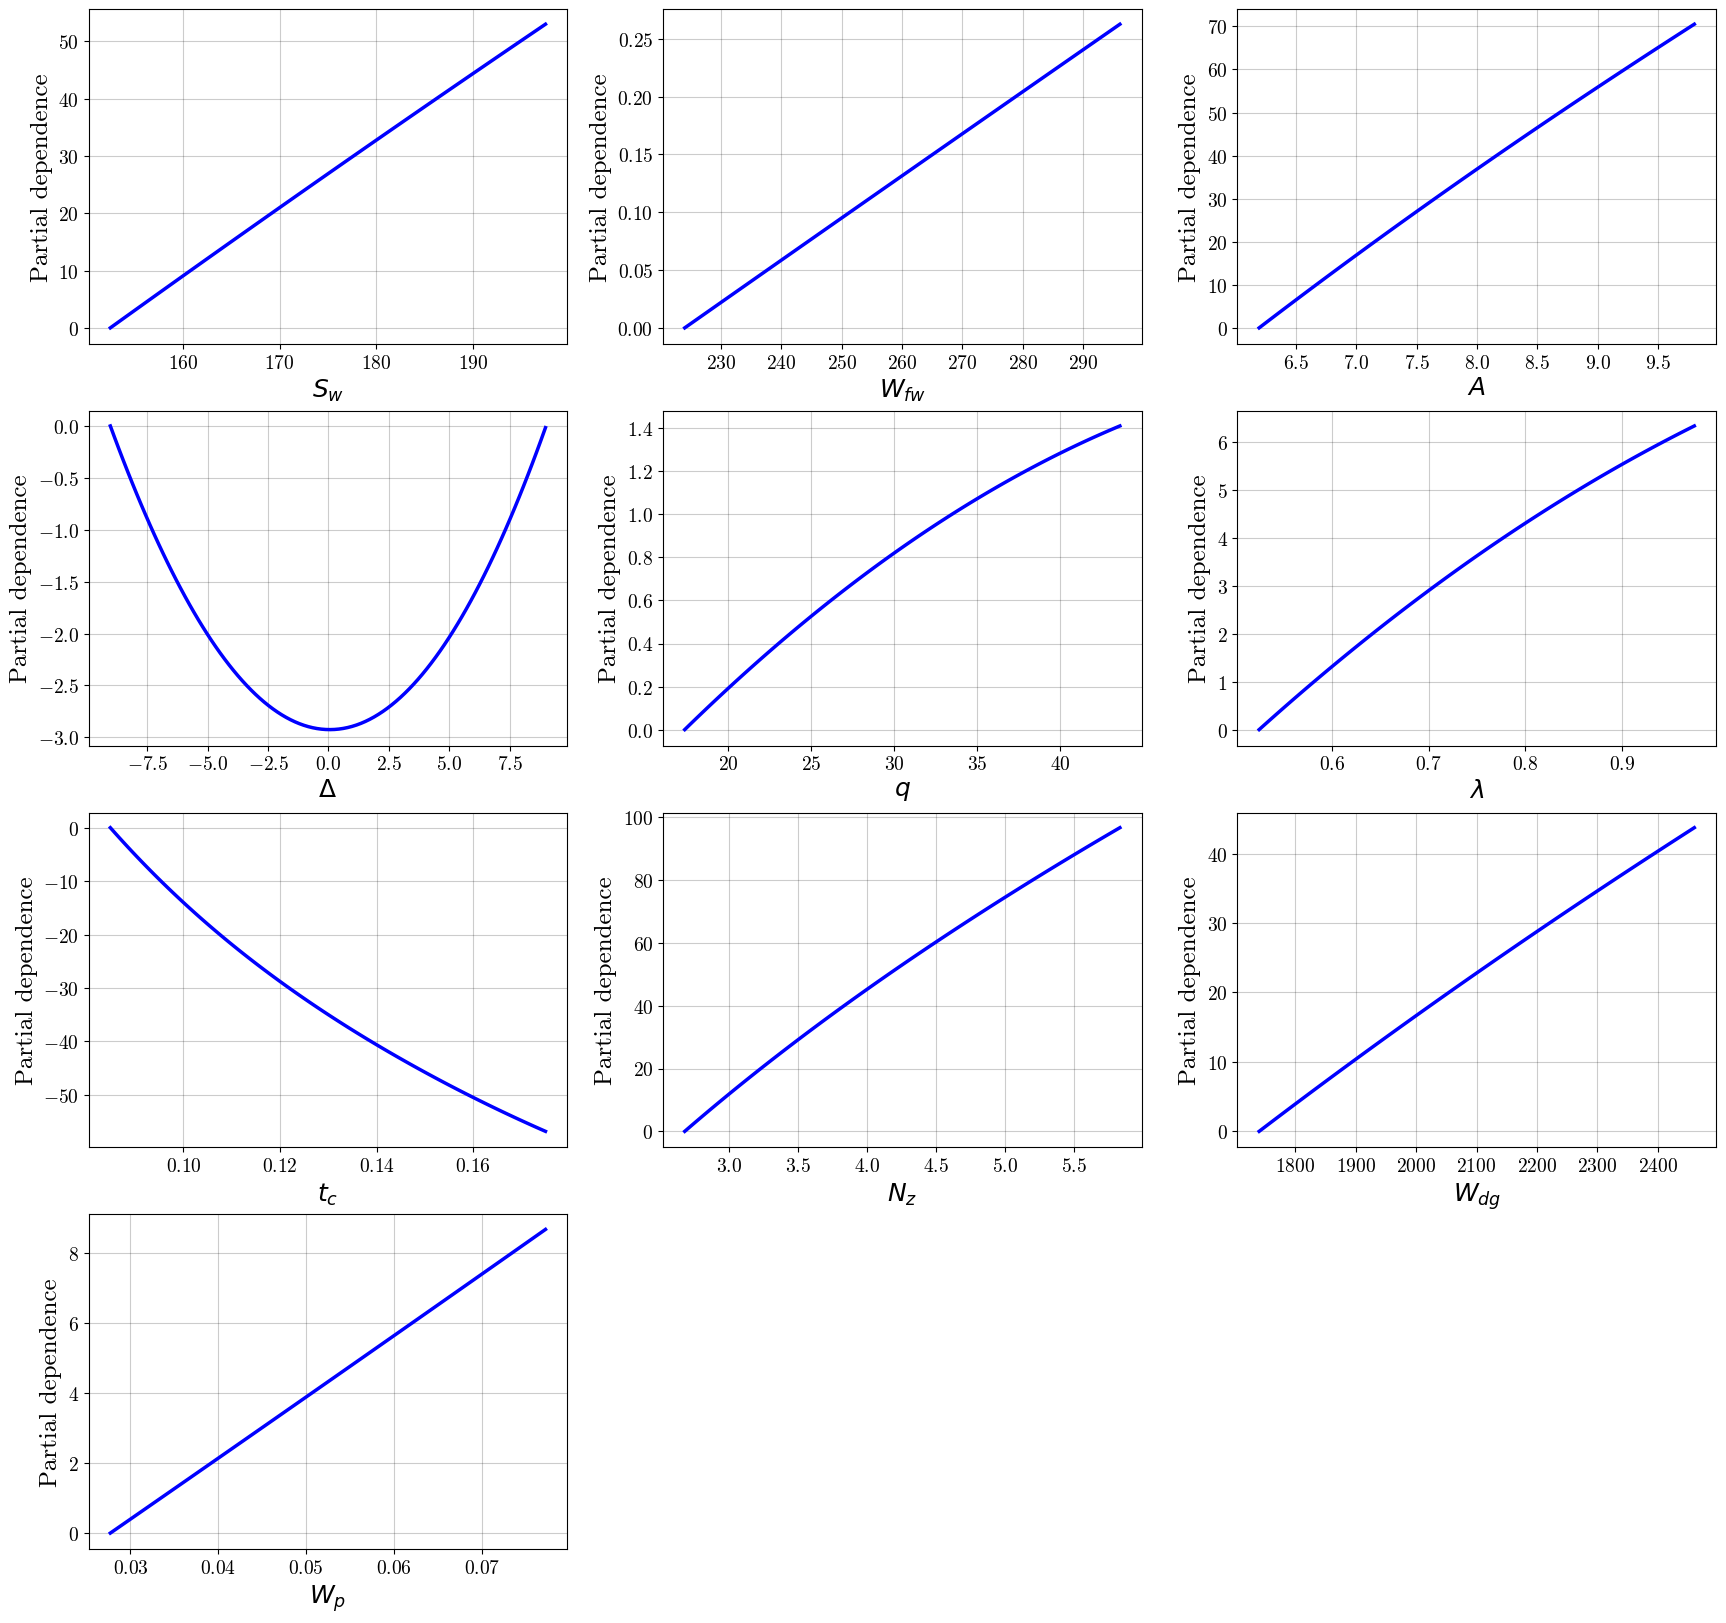

In [29]:
features = [i for i in range(x.shape[1])]
grid_resolution = 100

pdd = PartialDependenceDisplay.from_surrogate_model(
    sm,
    x,
    features,
    feature_names=feature_names,
    kind='average',
    grid_resolution=grid_resolution,
)
fig = pdd.plot(centered=True)
fig

In [38]:
pd_results = pdd.pd_results
assert len(pd_results) == len(features)
for i in range(len(pd_results)):
    assert set(pd_results[i].keys()) == {"grid_values", "average"}
    assert len(pd_results[i]["grid_values"]) == 1
    assert pd_results[i]["average"].shape == (grid_resolution, )
    


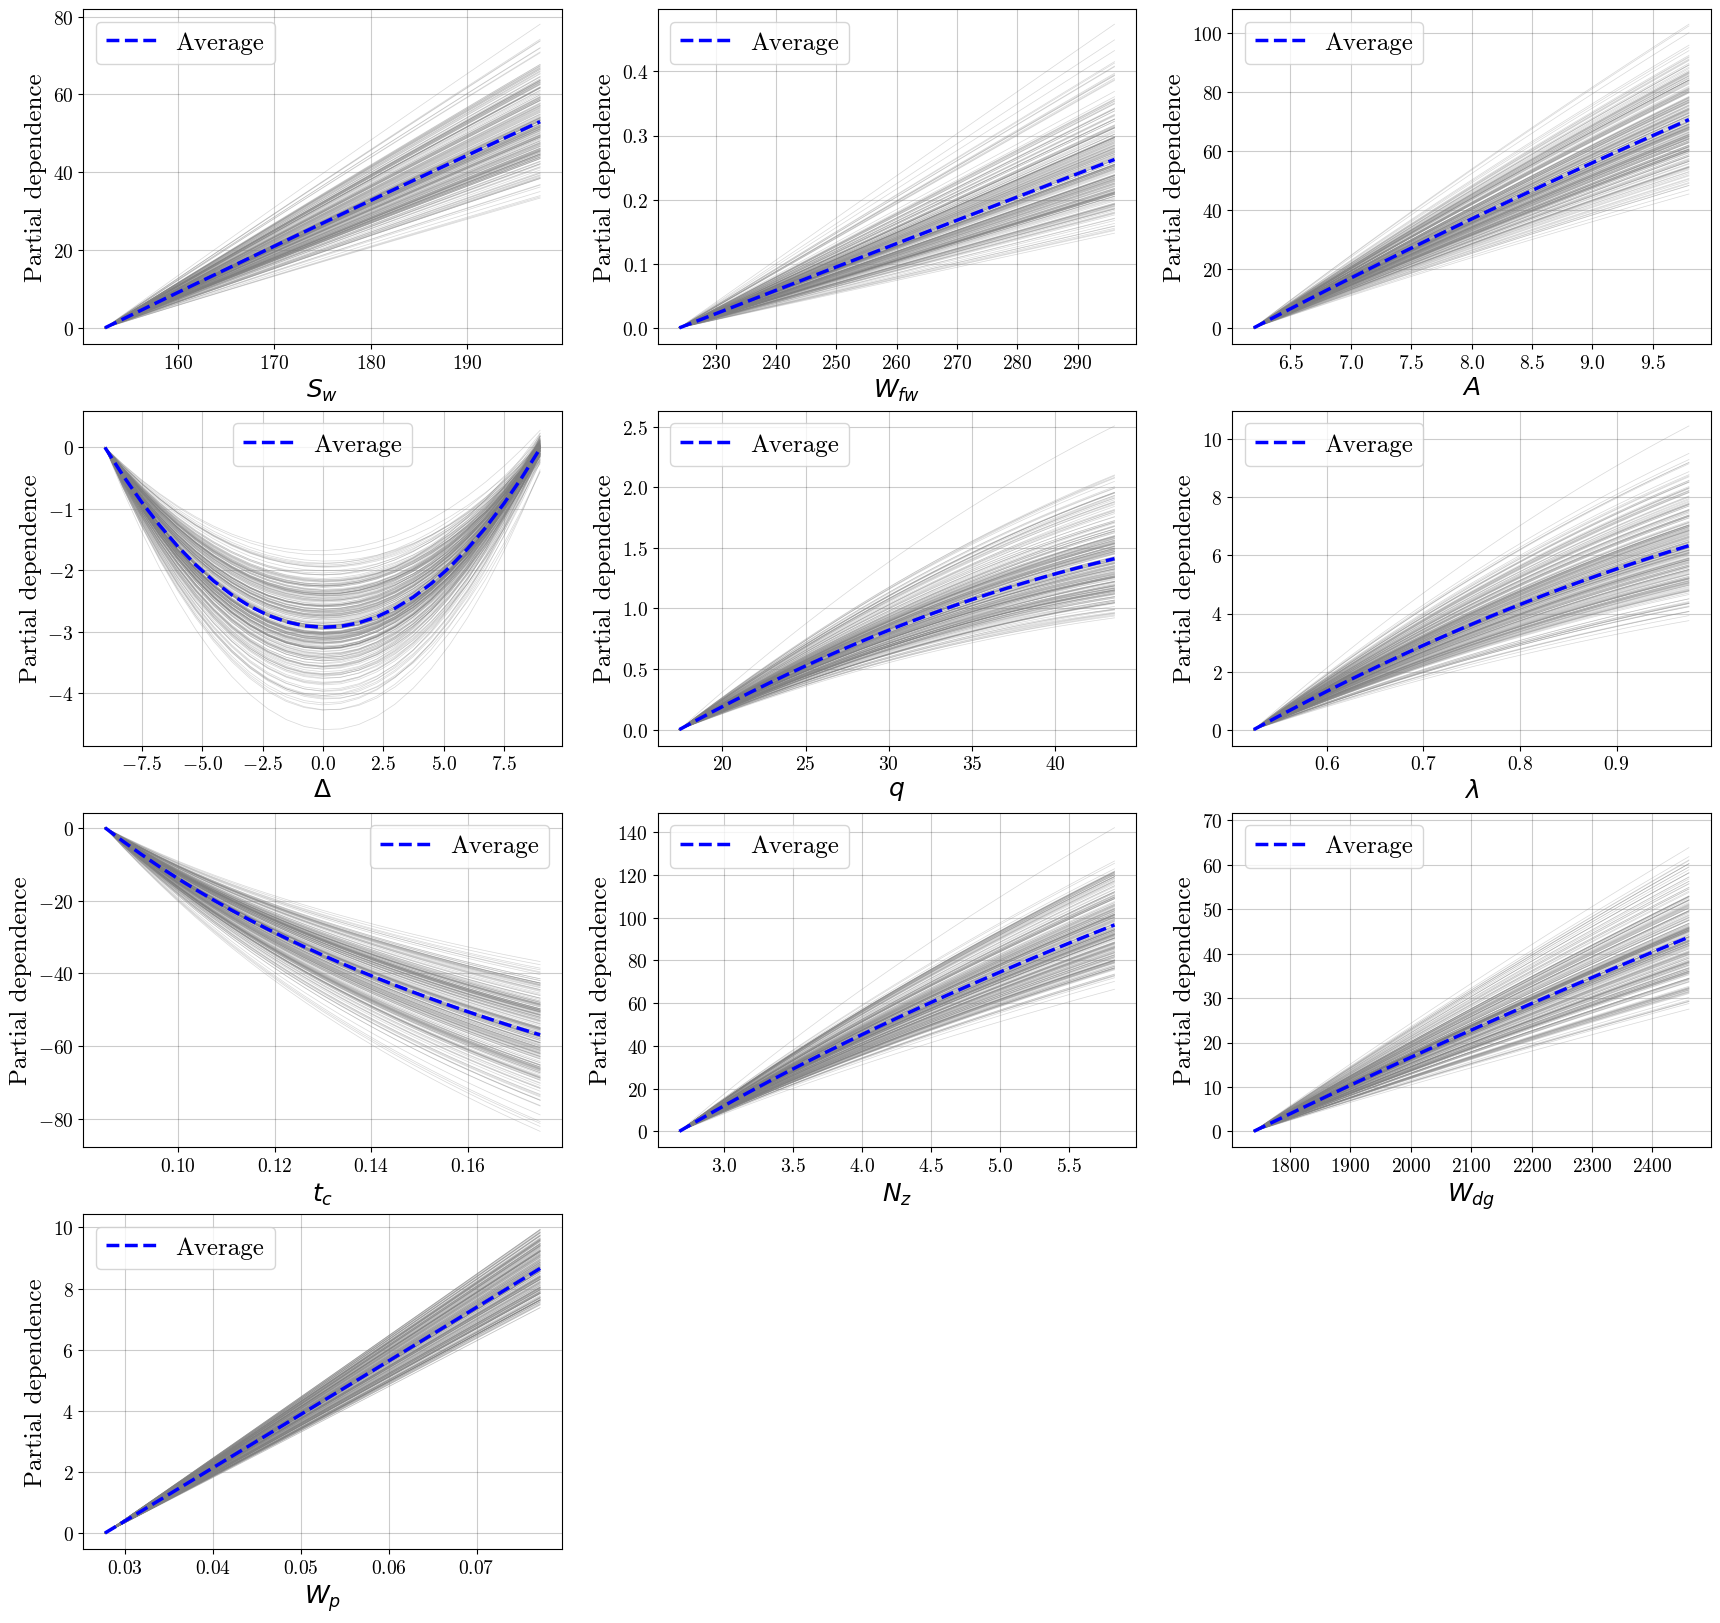

In [65]:
features = [i for i in range(x.shape[1])]
grid_resolution = 25

pdd = PartialDependenceDisplay.from_surrogate_model(
    sm,
    x,
    features,
    feature_names=feature_names,
    kind='both',
    grid_resolution=grid_resolution,
)
fig = pdd.plot(centered=True)
fig 

In [69]:
pd_results = pdd.pd_results
assert len(pd_results) == len(features)
for i in range(len(pd_results)):
    assert set(pd_results[i].keys()) == {"grid_values", "average", "individual"}
    assert len(pd_results[i]["grid_values"]) == 1
    assert pd_results[i]["average"].shape == (ndoe, )
    assert pd_results[i]["individual"].shape == (ndoe, grid_resolution)


AssertionError: 

In [68]:
pd_results[0]["grid_values"][0].shape

(25,)

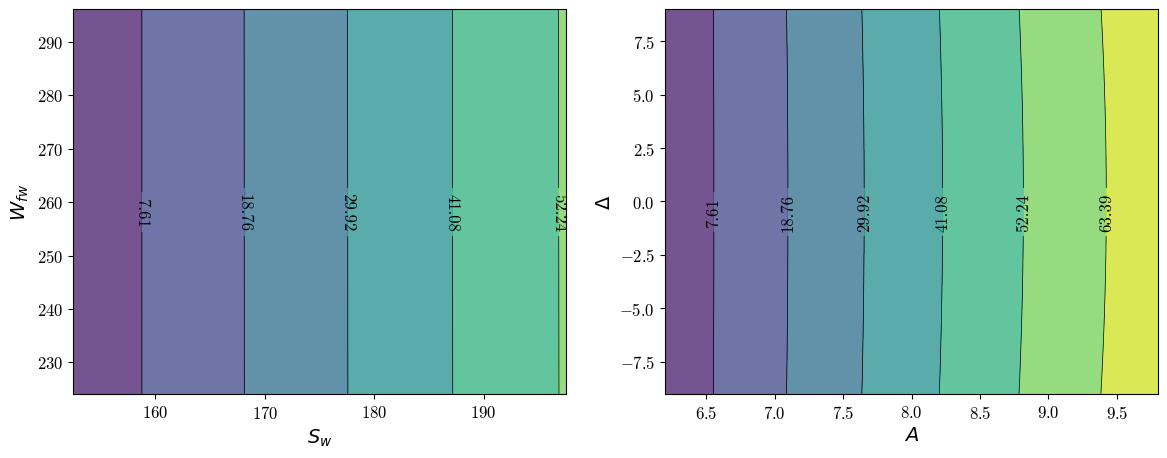

In [43]:
features = [(0, 1), (2, 3)]
grid_resolution = 20

pdd = PartialDependenceDisplay.from_surrogate_model(
    sm,
    x,
    features,
    feature_names=feature_names,
    grid_resolution=grid_resolution,
)
fig = pdd.plot(centered=True)
fig

In [60]:
pd_results = pdd.pd_results
assert len(pd_results) == len(features)
for i in range(len(pd_results)):
    assert set(pd_results[i].keys()) == {"grid_values", "average"}
    assert len(pd_results[i]["grid_values"]) == 2
    for j in range(len(pd_results[i]["grid_values"])):
        assert pd_results[i]["grid_values"][j].shape == (grid_resolution, )

    assert pd_results[i]["average"].shape == (grid_resolution, grid_resolution)

In [59]:
pd_results[0]["average"].shape

(20, 20)